In [ ]:
pip install tensorflow

In [1]:
#Inicar con las librerias necesarias
import tensorflow as tf
import numpy as np

In [2]:
#vamos a crear un conjunto de datos simple para entrenar nuestra red neuronal simple
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46.4, 59, 71.6, 100], dtype=float)

In [3]:
#usaremos el framework keras de tensorflow para crear nuestra red neuronal
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
# units = 1 porque solo queremos una salida (fahrenheit)
# input_shape = [1] porque solo tenemos una entrada (celsius)
modelo = tf.keras.Sequential([capa])
# Sequential porque nuestra red neuronal es secuencial, es decir, una capa tras otra


c:\Users\gerar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)
# Adam es un optimizador que ajusta los pesos de la red neuronal
# mean_squared_error es una funcion de perdida que mide el error cuadratico medio entre las pred

In [5]:
print("Entrenando modelo")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado")
# epochs = 1000 significa que el modelo pasara 1000 veces por todo el conjunto de datos para ajustar los pesos 


Entrenando modelo
Modelo entrenado


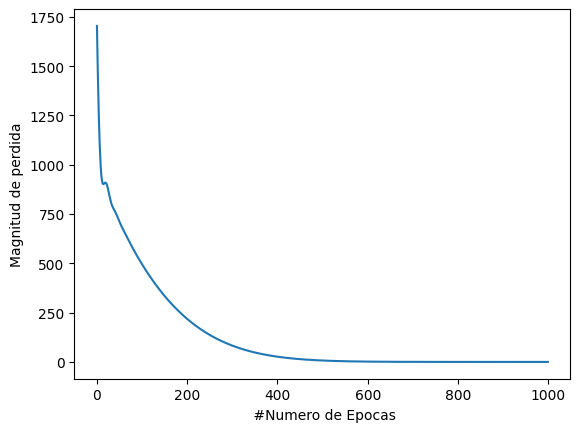

In [6]:
#vamos a graficar la perdida durante el entrenamiento
import matplotlib.pyplot as plt

plt.xlabel(" #Numero de Epocas")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history['loss'])
# .history es un diccionario que contiene la historia del entrenamiento
# 'loss' es la clave que contiene la magnitud de perdida en cada epoca
# .history es una atributo del objeto historial que contiene la historia del entrenamiento
#  que viene de la funcion fit del framework keras
plt.show()

In [7]:
#hacer una prediccion
resultado = modelo.predict(np.array([100.0]))
print("El resultado de la prediccion es: " + str(resultado[0][0]) + " fahrenheit")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
El resultado de la prediccion es: 211.60196 fahrenheit


In [8]:
print("Imprimir sesgos y pesos del modelo")
print(modelo.get_weights())

Imprimir sesgos y pesos del modelo
[array([[1.7966613]], dtype=float32), array([31.935839], dtype=float32)]


En resumen esta red es simple y funciona bien por que es parecida al formula de funcion linea (y = mx + b)